In [0]:
# call-in dependencies
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# lets get our data
(x_train , _) , (x_test , _) = mnist.load_data()

# normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# vectorizing into a 784x1 vector
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
# lets architect our model

input_img = Input(shape = (784 , )) # input layer for our model
encoder_dim = 32 # compression factor is 24.5 i.e. 784/32

# other importnat layers of our model
encoded = Dense(128 , activation = 'relu')(input_img)
encoded = Dense(64 , activation = 'relu')(encoded)
encoded = Dense(32 , activation = 'relu')(encoded)

decoded = Dense(64 , activation = 'relu')(encoded)
decoded = Dense(128 , activation = 'relu')(decoded)
decoded = Dense(784 , activation = 'sigmoid')(decoded)

autoencoder = Model(input_img , decoded)

In [0]:
# lets compile our model
autoencoder.compile(loss = 'binary_crossentropy' , optimizer = "adadelta")

In [0]:
# lets train our model
autoencoder.fit(x_train , x_train,
                epochs = 100,
                batch_size = 256,
                shuffle = True,
                validation_data = (x_test , x_test))

60000/60000 [==============================] - 6s 98us/step - loss: 0.1139 - val_loss: 0.1121
Epoch 73/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.1137 - val_loss: 0.1140
Epoch 74/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.1134 - val_loss: 0.1118
Epoch 75/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.1132 - val_loss: 0.1160
Epoch 76/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.1129 - val_loss: 0.1118
Epoch 77/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.1127 - val_loss: 0.1145
Epoch 78/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.1127 - val_loss: 0.1122
Epoch 79/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.1125 - val_loss: 0.1111
Epoch 80/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1124 - val_loss: 0.1105
Epoch 81/100
60000/60000 [=====================

In [0]:
# lets seperate our main model into 2 for further visualization
encoder = Model(input_img , encoded)

# seperating out the results one by one I know its silly and do correct me if there is any other way for such result exploitation
encoder_input = Input(shape = (encoder_dim , ))
decoding_layer1 = autoencoder.layers[-3] 
decoder1 = Model(encoder_input , decoding_layer1(encoder_input))

encoder_input1 = Input(shape = (64 , ))
decoding_layer2 = autoencoder.layers[-2]
decoder2 = Model(encoder_input1 , decoding_layer2(encoder_input1))

encoder_input2 = Input(shape = (128 , ))
decoding_layer3 = autoencoder.layers[-1]
decoder3 = Model(encoder_input2 , decoding_layer3(encoder_input2))

In [0]:
# the data fro visualization by using the 2 model we designed above
encoded_imgs = encoder.predict(x_test)
decoded_imgs1 = decoder1.predict(encoded_imgs)
decoded_imgs2 = decoder2.predict(decoded_imgs1)
decoded_imgs3 = decoder3.predict(decoded_imgs2)

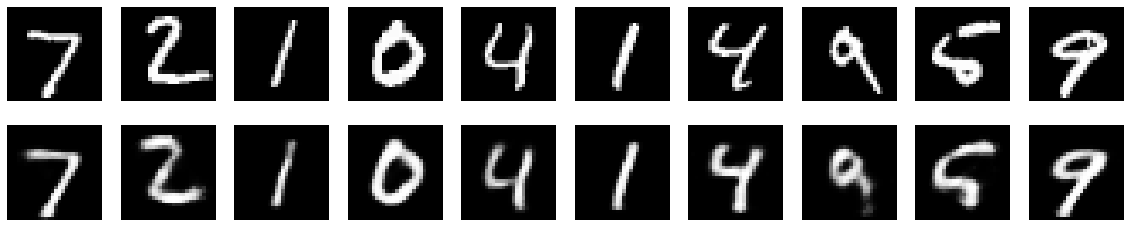

In [0]:
# we will now visualse the results and their accuracy
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs3[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
change = encoded_imgs.mean() 
print(change)

9.786369


In [0]:
# just following the trend of checking the mean
# so as you can see the quality of generated images are quite remarkable in comparision to any other autoencoder we have so far designed